Step 1: Loading and preparing data...
Found and loading file: Final_dataset_group_23.csv
Data loading complete! A total of 2385260 records were loaded.

--- Step 2: Cleaning data ---
Removed 2134193 invalid records (mileage <= 0).
There are a total of 251067 valid records after cleaning.

--- Step 3: Calculating statistical summary for valid mileage data ---
count    251067.000000
mean       6928.744722
std        9924.847175
min          89.000000
25%        1791.000000
50%        2956.000000
75%        5643.000000
max       35391.000000
Name: transmission_defective_mileage, dtype: float64

--- Step 4: Generating analysis charts ---


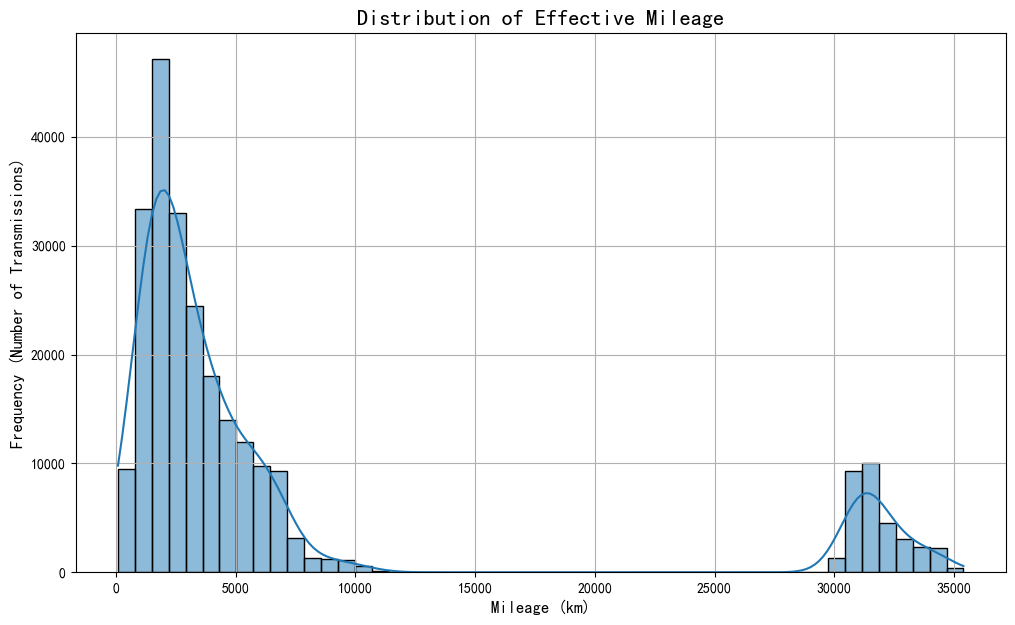

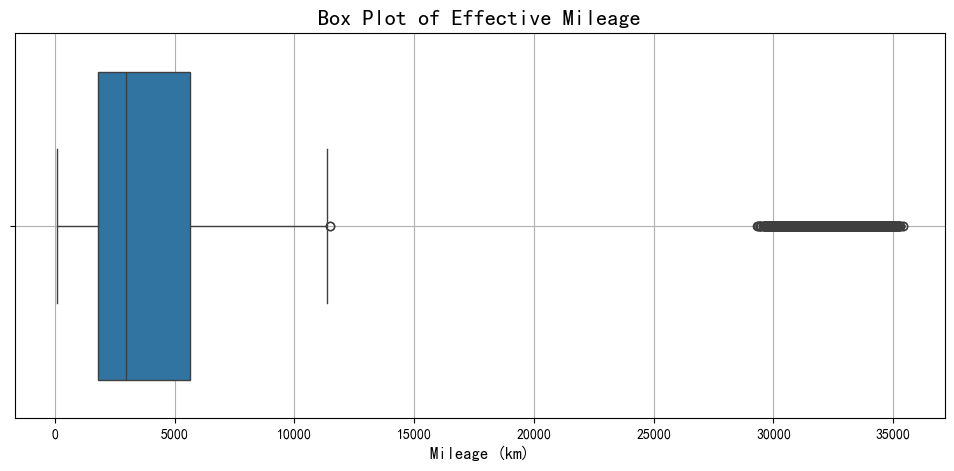


All charts generated successfully!


In [3]:
# -*- coding: utf-8 -*-
# Purpose: To analyze the distribution of effective mileage for all transmissions in the dataset.
# Version: 6.0 - Universal Final Version (can automatically handle CSV or Excel files)

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration and Helper Functions ---
# The final dataset file is in the same directory as the Notebook
BASE_DIR = Path(".")
FINAL_DATASET_FILENAME_BASE = "Final_dataset_group_23" # Base filename

def read_data_file(file_path: Path) -> pd.DataFrame:
    """
    Reads a data file, automatically detecting its format (CSV, XLS, XLSX)
    and using the correct method to open it.
    """
    file_suffix = file_path.suffix.lower()
    
    try:
        if file_suffix == '.csv':
            df = pd.read_csv(file_path, sep=",", quotechar='"', encoding="utf-8", engine="python")
        elif file_suffix in ['.xls', '.xlsx']:
            engine_to_use = 'openpyxl' if file_suffix == '.xlsx' else 'xlrd'
            df = pd.read_excel(file_path, dtype=str, engine=engine_to_use)
        else:
            print(f"Unsupported file format {file_path}. Skipping.")
            return pd.DataFrame()

        possible_index_cols = [col for col in df.columns if col.lower().startswith("unnamed")]
        if possible_index_cols:
            df = df.drop(columns=possible_index_cols)
        return df
        
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return pd.DataFrame()

def find_first_matching_file(directory: Path, base_filename: str) -> Path | None:
    """
    Finds the first file matching a base name with any of the supported extensions.
    """
    supported_extensions = ['.csv', '.xlsx', '.xls']
    for ext in supported_extensions:
        files = list(directory.glob(f"{base_filename}{ext}"))
        if files:
            return files[0]
    return None
    
# -----------------------------
# Step 1: Load and prepare data
# -----------------------------
print("Step 1: Loading and preparing data...")
FINAL_DATASET_FILE = find_first_matching_file(BASE_DIR, FINAL_DATASET_FILENAME_BASE)
if not FINAL_DATASET_FILE:
    raise FileNotFoundError(f"Final dataset file not found! Please confirm that '{FINAL_DATASET_FILENAME_BASE}.csv' or '.xls' is in the same folder as your .ipynb file.")

print(f"Found and loading file: {FINAL_DATASET_FILE}")
df = read_data_file(FINAL_DATASET_FILE)

# --- Data preprocessing ---
mileage_col = 'transmission_defective_mileage'
if mileage_col not in df.columns:
    raise ValueError(f"Error: Necessary column '{mileage_col}' is missing from the dataset.")

df[mileage_col] = pd.to_numeric(df[mileage_col], errors='coerce')
df.dropna(subset=[mileage_col], inplace=True)

print(f"Data loading complete! A total of {len(df)} records were loaded.")

# -----------------------------
# Step 2: Data cleaning
# -----------------------------
print("\n--- Step 2: Cleaning data ---")
df_cleaned = df[df[mileage_col] > 0].copy()
print(f"Removed {len(df) - len(df_cleaned)} invalid records (mileage <= 0).")
print(f"There are a total of {len(df_cleaned)} valid records after cleaning.")

if df_cleaned.empty:
    print("\nError: No valid data available for analysis after cleaning.")
else:
    # -----------------------------
    # Step 3: Calculate statistical summary
    # -----------------------------
    print("\n--- Step 3: Calculating statistical summary for valid mileage data ---")
    print(df_cleaned[mileage_col].describe())

    # -----------------------------
    # Step 4: Generate analysis charts
    # -----------------------------
    print("\n--- Step 4: Generating analysis charts ---")

    # --- Chart 1: Mileage Distribution Histogram ---
    plt.figure(figsize=(12, 7))
    sns.histplot(df_cleaned[mileage_col], bins=50, kde=True)
    plt.title("Distribution of Effective Mileage", fontsize=16)
    plt.xlabel("Mileage (km)", fontsize=12)
    plt.ylabel("Frequency (Number of Transmissions)", fontsize=12)
    plt.grid(True)
    plt.show()

    # --- Chart 2: Mileage Distribution Box Plot ---
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df_cleaned[mileage_col])
    plt.title("Box Plot of Effective Mileage", fontsize=16)
    plt.xlabel("Mileage (km)", fontsize=12)
    plt.grid(True)
    plt.show()

    print("\nAll charts generated successfully!")
